## Connecting to drive
This notebook was runned in google colaboratory
As example we maintain the cell with the connection to the google drive 


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


## Import libraries and read nii files

In [1]:
import nibabel as nib
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import glob


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## Check total number of images

In [2]:
DATASET_STRUCTURED_DIR = "/home/ubuntu/volume1/BrainHack/"

In [3]:
def find_nii(DIR):
    files_CT = glob.glob(os.path.join(DIR,'*','*','*','*','*.nii'))
    print(len(files_CT))
    print(os.path.join(DIR,'MRI','DWI','*','*','*','*.nii'))
    files_MR = glob.glob(os.path.join(DIR,'MRI','DWI','*','*','*','*.nii'))
    print(len(files_MR))

    return files_CT,files_MR

files_CT2,files_MR2 = find_nii(DATASET_STRUCTURED_DIR) 

164
/home/ubuntu/volume1/BrainHack/MRI/DWI/*/*/*/*.nii
116


## Checking DWI data

Checking DWI images, read and plot 

In [4]:
for files in files_MR2:
    x = (nib.load(files).get_data())
    print(x.shape)

(256, 256, 27, 2)
(256, 256, 20)
(256, 256, 49)
(256, 256, 47)
(256, 256, 48, 2)
(256, 256, 22, 2)
(192, 192, 34)
(256, 256, 20)
(256, 256, 27, 2)
(256, 256, 53)
(256, 256, 47)
(256, 256, 26, 2)
(256, 256, 25)
(288, 288, 32)
(192, 192, 33)
(256, 256, 48, 2)
(256, 256, 47)
(256, 256, 48, 2)
(192, 192, 33)
(288, 288, 57)
(256, 256, 53)
(192, 192, 25)
(256, 256, 22, 2)
(256, 256, 30, 2)
(176, 176, 27)
(256, 256, 30, 2)
(256, 256, 30, 2)
(176, 176, 26)
(256, 256, 26, 2)
(256, 256, 25, 2)
(256, 256, 30, 2)
(256, 256, 38, 2)
(256, 256, 52, 3)
(256, 256, 48, 3)
(256, 256, 50, 6)
(256, 256, 33)
(256, 256, 48, 3)
(256, 256, 48, 3)
(256, 256, 37)
(256, 256, 48, 3)
(256, 256, 22, 2)
(256, 256, 39, 3)
(256, 256, 29, 2)
(256, 256, 37)
(256, 256, 48, 3)
(256, 256, 31, 2)
(256, 256, 28, 2)
(256, 256, 28, 2)
(256, 256, 38, 2)
(256, 256, 50, 3)
(256, 256, 28, 2)
(256, 256, 50, 3)
(256, 256, 25, 2)
(256, 256, 27, 2)
(256, 256, 48, 3)
(256, 256, 31, 7)
(256, 256, 27, 2)
(256, 256, 33, 2)
(256, 256, 48, 3

### Ploting one slice from several acquisitions

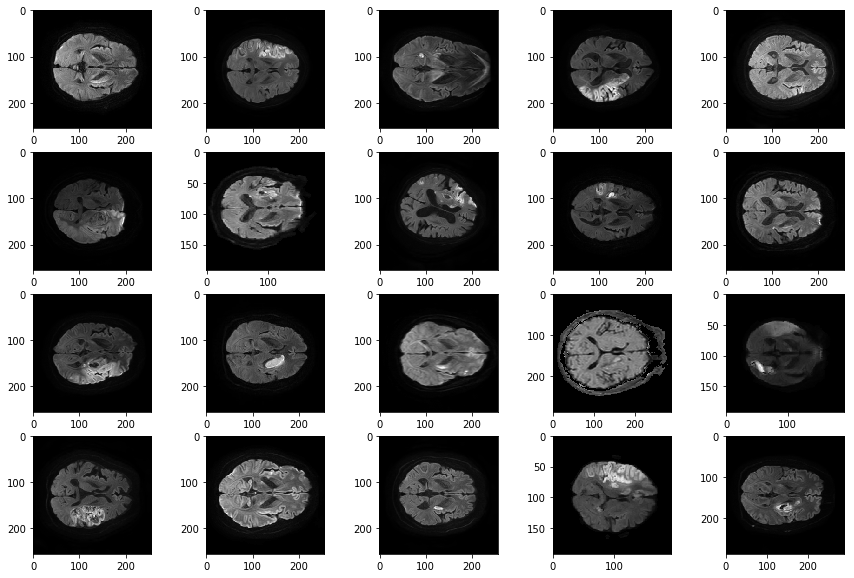

In [5]:
fig=plt.figure(figsize=(15, 10))
columns = 5; rows = 4

for i,files in enumerate(files_MR2[:20]):
    x = (nib.load(files).get_data())
    fig.add_subplot(rows, columns, i+1)
    if x.ndim == 4:
        plt.imshow(x[:,:,x.shape[2]//2,1], cmap='gray')
    else:
        plt.imshow(x[:,:,x.shape[2]//2], cmap='gray')

    fig.add_subplot

### Plotting the different b0

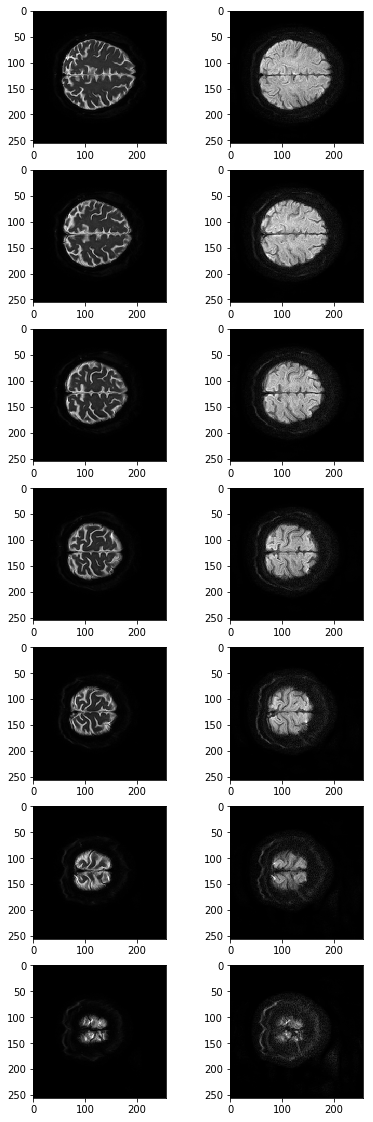

In [7]:
fig=plt.figure(figsize=(10, 20))
columns = 3; rows = 7

for i,files in enumerate(files_MR2[:1]):
    x = (nib.load(files).get_data())
    for i2 in np.arange(20,27):
        for i3 in np.arange(x.shape[3]):
            fig.add_subplot(rows, columns, i3+(i2-20)*3+1)
            plt.imshow(x[:,:,i2,i3], cmap='gray')

    fig.add_subplot